<a href="https://colab.research.google.com/github/choikanghoon/Aiffel_study/blob/master/Project02/Aiffel_Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 환경 설정 및 데이터 불러오기

In [2]:
# 환경 설정
import pandas as pd # 판다스 (데이터프레임)
import numpy as np # 넘파이
import random # 랜덤난수
import matplotlib.pyplot as plt # 그래프 그리기
import seaborn as sns # 그래프 그리기
from sklearn.model_selection import train_test_split, GridSearchCV # 데이터 분리
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # 회귀 모델
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트(회귀)
from xgboost import XGBRegressor # XGBoost(회귀)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/아이펠과정/Project/머신러닝_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/아이펠과정/Project/머신러닝_Project/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/아이펠과정/Project/머신러닝_Project/y_test.csv')

# 에어 비엔비 컬럼 설명
- id: 각 숙소의 고유 식별자.
- name: 숙소의 이름.
- host_id: 호스트의 고유 식별자.
- host_name: 호스트의 이름.
- neighbourhood_group: 지역 그룹. 예를 들어 도시 내의 다른 지역을 나타낼 수 있습니다.
- neighbourhood: 숙소가 위치한 동네 또는 지역.
- latitude: 숙소의 위도.
- longitude: 숙소의 경도.
- room_type: 숙소의 유형 (예: Entire home/apt, Private room).
- price: 1박 숙박에 대한 요금.
- minimum_nights: 최소 숙박 가능한 박수.
- number_of_reviews: 숙소에 대한 리뷰 수.
- last_review: 가장 최근 리뷰 날짜.
- reviews_per_month: 월별 리뷰 수.
- calculated_host_listings_count: 호스트가 소유한 숙소 수.
- availability_365: 연중 예약 가능한 날짜 수.

# 데이터 확인

In [4]:
# 각 2개씩 출력해서 컬럼 모양 확인
display(train.head(2))
display(test.head(2))
display(y_test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


,price
0,80
1,190


In [5]:
# 전체컬럼명 및 type 확인
train.info()
print("*" * 100)
test.info()
print("*" * 100)
y_test.info()
print("*" * 100)
# 데이터프레임 shape 확인
print(f"train의 shape : {train.shape}\ntest의 shape : {test.shape}\ny_test의 shape{y_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64
id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nigh

# EDA (탐색적 데이터 분석) 시각화

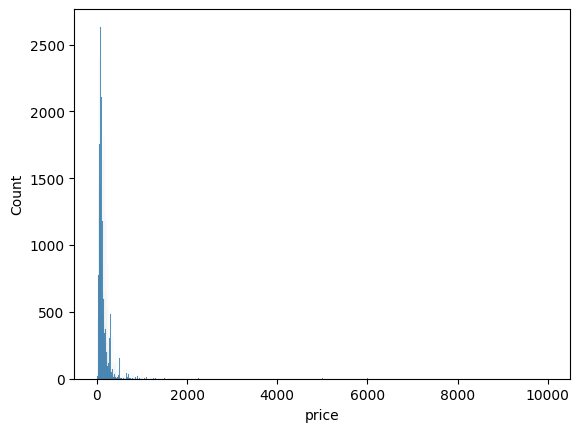

In [7]:
# histplot으로 확인한 결과 price의 값에 1만이상의 값이 있는 것으로 나옴
sns.histplot(train['price'])
plt.show()

In [8]:
# 룸 타입이 3가지가 있는 것을 확인 및 이름 확인
print(train['room_type'].nunique())
print(train['room_type'].value_counts())

3
Entire home/apt    20299
Private room       17876
Shared room          941
Name: room_type, dtype: int64


In [9]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31122.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,152.751150,6.990720,23.272855,1.372444,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,241.752501,20.310323,44.589170,1.683963,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,105.000000,2.000000,5.000000,0.710000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,175.000000,5.000000,23.000000,2.010000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
train.corr()

<ipython-input-10-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591261,-0.002445,0.092199,0.009364,-0.011869,-0.319121,0.292461,0.132020,0.085416
host_id,0.591261,1.000000,0.020077,0.129314,0.013407,-0.016550,-0.141992,0.295881,0.152545,0.201772
latitude,-0.002445,0.020077,1.000000,0.082819,0.034243,0.026376,-0.010896,-0.004768,0.020802,-0.006414
longitude,0.092199,0.129314,0.082819,1.000000,-0.149165,-0.061787,0.059188,0.143867,-0.114195,0.087417
price,0.009364,0.013407,0.034243,-0.149165,1.000000,0.037318,-0.047780,-0.032975,0.056301,0.083983
minimum_nights,-0.011869,-0.016550,0.026376,-0.061787,0.037318,1.000000,-0.078471,-0.115527,0.130441,0.141984
number_of_reviews,-0.319121,-0.141992,-0.010896,0.059188,-0.047780,-0.078471,1.000000,0.547786,-0.072237,0.172597
reviews_per_month,0.292461,0.295881,-0.004768,0.143867,-0.032975,-0.115527,0.547786,1.000000,-0.011055,0.184217
calculated_host_listings_count,0.132020,0.152545,0.020802,-0.114195,0.056301,0.130441,-0.072237,-0.011055,1.000000,0.225041
availability_365,0.085416,0.201772,-0.006414,0.087417,0.083983,0.141984,0.172597,0.184217,0.225041,1.000000


<ipython-input-11-ae6a3dba9809>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, fmt='.2f')


<Axes: >

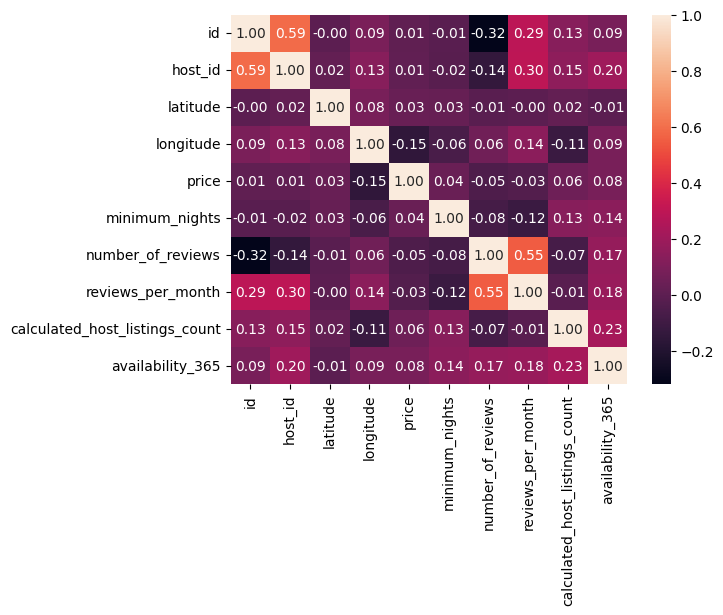

In [11]:
# 상관관계를 확인한결과 그렇게 관계가 있다고 생각하지는 않으므로, 수치형 데이터들에서는 id값과 같이 고유값인것들을 제외하고 비교하는게 맞다고 생각
sns.heatmap(train.corr(), annot=True, fmt='.2f')

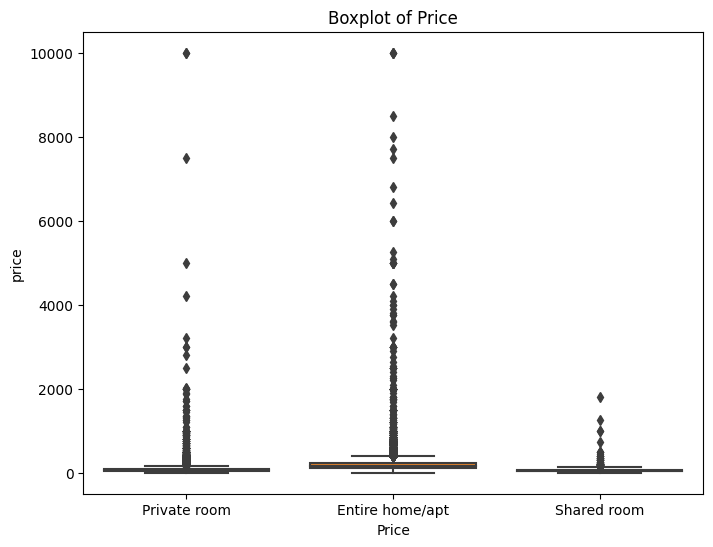

In [12]:
# room_type 별 가격의 이상치를 확인했으나, 가격의 이상치는 충분히 있어도 되는 데이터라고 생각
plt.figure(figsize=(8, 6))
sns.boxplot(y=train['price'], x=train['room_type'])


plt.xlabel('Price')
plt.title('Boxplot of Price')


plt.show()


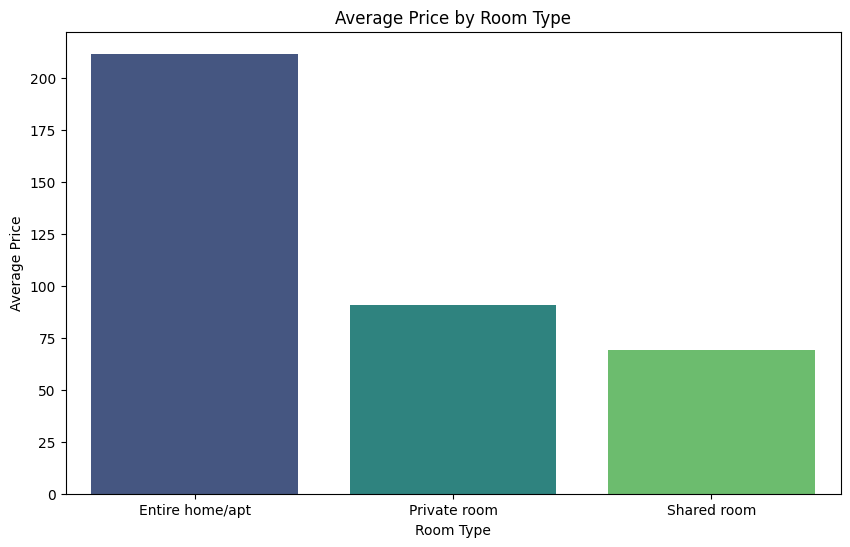

In [13]:
# room_type으로 가격의 평균 계산
# 가격에 이상치가 많지만, 평균가격에 미치는 데이터들의 값이 낮은것으로 인하여 평균값이 낮게 나오는것으로 확인
# 그렇다면, 비싼가치의 건물이 아니라면, 평균값 범주안에 들게 가격을 책정해도 되지 않을까 생각
avg_price_by_room_type = train.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_room_type, x='room_type', y='price', palette='viridis')

plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


In [14]:
print(train['neighbourhood'].nunique())
print(train['neighbourhood'].value_counts())

221
Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
                      ... 
Silver Lake              1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64


In [15]:
print(train['neighbourhood_group'].nunique())
print(train['neighbourhood_group'].value_counts())

5
Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: neighbourhood_group, dtype: int64


<Figure size 1200x600 with 0 Axes>

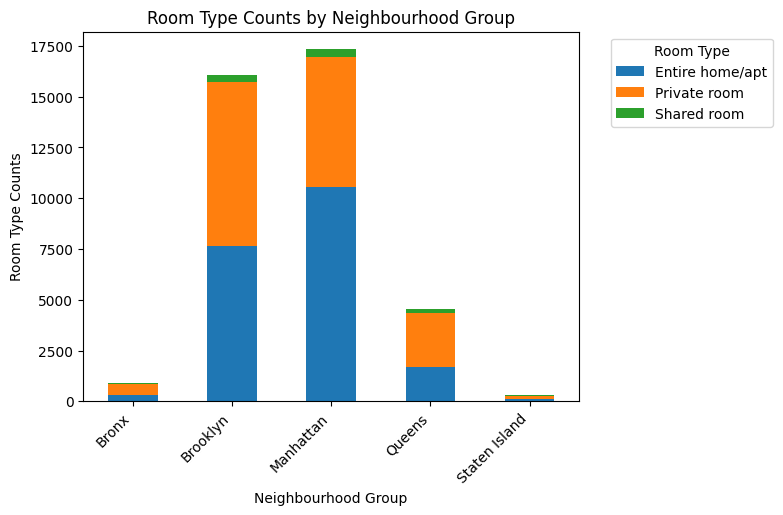

In [16]:
# 지역의 수가 너무많아서 지역의 그룹으로 room_type의 수 확인
# 지역별로 Entire home/apt가 가장 많은 것으로 확인
room_type_counts = train.groupby(['neighbourhood_group', 'room_type']).size().unstack()

plt.figure(figsize=(12, 6))
room_type_counts.plot(kind='bar', stacked=True)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Room Type Counts')
plt.title('Room Type Counts by Neighbourhood Group')

plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

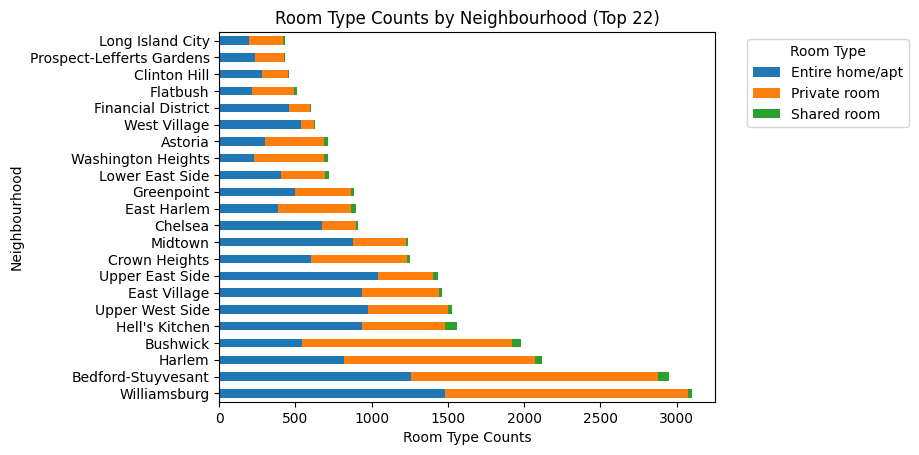

In [17]:
# 전체지역에서 상위권 1/10 만 그래프로 출력
room_type_group_counts = train.groupby(['neighbourhood', 'room_type']).size().unstack()
top_n_neighbourhoods = room_type_group_counts.sum(axis=1).nlargest(22).index

selected_room_type_group_counts = room_type_group_counts.loc[top_n_neighbourhoods]
plt.figure(figsize=(12, 6))
selected_room_type_group_counts.plot(kind='barh', stacked=True)

plt.yticks(rotation=0)
plt.ylabel('Neighbourhood')
plt.xlabel('Room Type Counts')
plt.title('Room Type Counts by Neighbourhood (Top 22)')

plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 범주형데이터, 수치형데이터 정의

In [18]:
# 시각화를 해본결과, 룸타입, 지역, 지역별 그룹을 인코딩해서 수치형데이터로 바꾸어 사용해도 될 것 같다고 판단
categori = ['neighbourhood',
            'neighbourhood_group',
            'room_type']
display(train[categori])
display(test[categori])
train.info()
# 수치형데이터에서 id와 hostid는 필요없다고생각했고, 리뷰마지막날짜 같은 개념도 필요없기에 제외
cols = ['latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]
display(train[cols])
display(test[cols])

,neighbourhood,neighbourhood_group,room_type
0,Harlem,Manhattan,Private room
1,Hell's Kitchen,Manhattan,Entire home/apt
2,West Village,Manhattan,Entire home/apt
3,Bedford-Stuyvesant,Brooklyn,Entire home/apt
4,Bedford-Stuyvesant,Brooklyn,Private room
...,...,...,...
39111,Financial District,Manhattan,Entire home/apt
39112,Springfield Gardens,Queens,Private room
39113,Upper East Side,Manhattan,Entire home/apt
39114,Greenwich Village,Manhattan,Entire home/apt


,neighbourhood,neighbourhood_group,room_type
0,Williamsburg,Brooklyn,Private room
1,Upper West Side,Manhattan,Entire home/apt
2,Clinton Hill,Brooklyn,Entire home/apt
3,Clinton Hill,Brooklyn,Entire home/apt
4,Harlem,Manhattan,Entire home/apt
...,...,...,...
9774,Greenpoint,Brooklyn,Entire home/apt
9775,Bushwick,Brooklyn,Private room
9776,Cambria Heights,Queens,Private room
9777,Harlem,Manhattan,Private room


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.80167,-73.95781,3,3,0.09,2,0
1,40.76037,-73.99016,2,64,1.68,2,262
2,40.73001,-74.00562,60,1,0.20,1,0
3,40.69128,-73.93653,4,239,2.89,2,1
4,40.68899,-73.95555,28,0,NaN,1,0
...,...,...,...,...,...,...,...
39111,40.71035,-74.00734,30,0,NaN,2,346
39112,40.66102,-73.77035,1,57,7.28,3,342
39113,40.77693,-73.94524,7,0,NaN,1,0
39114,40.73110,-73.99913,30,19,0.23,1,259


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70959,-73.94652,3,2,0.31,1,0
1,40.79368,-73.96487,3,159,2.09,1,244
2,40.68722,-73.96289,1,54,0.65,4,365
3,40.68859,-73.96035,3,2,0.13,1,0
4,40.80573,-73.94994,1,160,4.31,3,246
...,...,...,...,...,...,...,...
9774,40.72413,-73.95090,2,14,0.70,1,93
9775,40.69447,-73.91364,2,5,4.17,2,301
9776,40.69090,-73.73193,1,34,11.21,1,61
9777,40.82146,-73.94598,1,0,NaN,1,0


In [19]:
# 범주형 데이터 라벨링 실시
le = LabelEncoder()
for column in categori:
    new_column_name = column + '_encoded'
    train[new_column_name] = le.fit_transform(train[column])

In [20]:
train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0,94,2,1
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262,95,2,0
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0,209,2,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1,13,1,0
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Jessie,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,185,30,0,NaN,NaN,2,346,73,2,0
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,Queens,Springfield Gardens,40.66102,-73.77035,Private room,50,1,57,2019-06-21,7.28,3,342,183,3,1
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Tola,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,120,7,0,NaN,NaN,1,0,201,2,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,165,30,19,2018-10-15,0.23,1,259,92,2,0


In [21]:
for column in categori:
    new_column_name = column + '_encoded'
    test[new_column_name] = le.fit_transform(test[column])

In [22]:
test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0,187,1,1
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244,177,2,0
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365,35,1,0
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0,35,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246,83,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,16024539,"Beautiful Greenpoint, Brooklyn apt by the park",1622733,Cristina,Brooklyn,Greenpoint,40.72413,-73.95090,Entire home/apt,2,14,2019-06-08,0.70,1,93,80,1,0
9775,35235326,New private studio & separate entry for adults,96659533,Angelica,Brooklyn,Bushwick,40.69447,-73.91364,Private room,2,5,2019-07-02,4.17,2,301,23,1,1
9776,33471805,Comfortable Room with Private Bath - 15 min to...,252191305,Marion,Queens,Cambria Heights,40.69090,-73.73193,Private room,1,34,2019-06-30,11.21,1,61,24,3,1
9777,28534405,New york Multi-unit building,2891643,Jacqueline,Manhattan,Harlem,40.82146,-73.94598,Private room,1,0,NaN,NaN,1,0,83,2,1


In [23]:
train.drop(categori,axis=1,inplace=True)

In [24]:
train

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,40.80167,-73.95781,70,3,3,2019-01-01,0.09,2,0,94,2,1
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,40.76037,-73.99016,240,2,64,2019-06-30,1.68,2,262,95,2,0
2,26871281,West Village Apartment,440022,Petter,40.73001,-74.00562,150,60,1,2019-02-07,0.20,1,0,209,2,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,40.69128,-73.93653,85,4,239,2019-06-26,2.89,2,1,13,1,0
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,40.68899,-73.95555,44,28,0,NaN,NaN,1,0,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Jessie,40.71035,-74.00734,185,30,0,NaN,NaN,2,346,73,2,0
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,40.66102,-73.77035,50,1,57,2019-06-21,7.28,3,342,183,3,1
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Tola,40.77693,-73.94524,120,7,0,NaN,NaN,1,0,201,2,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,40.73110,-73.99913,165,30,19,2018-10-15,0.23,1,259,92,2,0


In [25]:
test.drop(categori, axis=1, inplace=True)

# 필요없는 데이터 제거 및 결측치 채우기

In [26]:
train.drop('last_review', axis=1, inplace=True)
test.drop('last_review', axis=1, inplace=True)

In [27]:
display(train)
display(test)

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,40.80167,-73.95781,70,3,3,0.09,2,0,94,2,1
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,40.76037,-73.99016,240,2,64,1.68,2,262,95,2,0
2,26871281,West Village Apartment,440022,Petter,40.73001,-74.00562,150,60,1,0.20,1,0,209,2,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,40.69128,-73.93653,85,4,239,2.89,2,1,13,1,0
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,40.68899,-73.95555,44,28,0,NaN,1,0,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Jessie,40.71035,-74.00734,185,30,0,NaN,2,346,73,2,0
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,40.66102,-73.77035,50,1,57,7.28,3,342,183,3,1
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Tola,40.77693,-73.94524,120,7,0,NaN,1,0,201,2,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,40.73110,-73.99913,165,30,19,0.23,1,259,92,2,0


,id,name,host_id,host_name,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,40.70959,-73.94652,3,2,0.31,1,0,187,1,1
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,40.79368,-73.96487,3,159,2.09,1,244,177,2,0
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,40.68722,-73.96289,1,54,0.65,4,365,35,1,0
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,40.68859,-73.96035,3,2,0.13,1,0,35,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,40.80573,-73.94994,1,160,4.31,3,246,83,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,16024539,"Beautiful Greenpoint, Brooklyn apt by the park",1622733,Cristina,40.72413,-73.95090,2,14,0.70,1,93,80,1,0
9775,35235326,New private studio & separate entry for adults,96659533,Angelica,40.69447,-73.91364,2,5,4.17,2,301,23,1,1
9776,33471805,Comfortable Room with Private Bath - 15 min to...,252191305,Marion,40.69090,-73.73193,1,34,11.21,1,61,24,3,1
9777,28534405,New york Multi-unit building,2891643,Jacqueline,40.82146,-73.94598,1,0,NaN,1,0,83,2,1


In [28]:
drop_col = ['id',
            'name',
            'host_name',
            'host_id']
train.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)

In [29]:
train.head(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_encoded,room_type_encoded
0,40.80167,-73.95781,70,3,3,0.09,2,0,94,2,1
1,40.76037,-73.99016,240,2,64,1.68,2,262,95,2,0


In [30]:
train.shape

(39116, 11)

In [31]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('price', axis=1), train['price'], test_size=0.2, random_state=2022)

In [33]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31292, 10) (7824, 10) (31292,) (7824,)


# 모델링

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

29210.072025519366

In [35]:
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

29212.084466689783

In [36]:
model = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# Test 데이터로 성능 평가
y_pred = best_model.predict(test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error on Test Set: 49472.40027227568


In [37]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

29858.34043989155

In [38]:
model = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# Test 데이터로 성능 평가
y_pred = best_model.predict(test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'alpha': 0.001}
Mean Squared Error on Test Set: 49472.419208868334


In [39]:
model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31317.849930108976

In [40]:
model = ElasticNet()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# Test 데이터로 성능 평가
y_pred = best_model.predict(test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Mean Squared Error on Test Set: 49471.3744459496


In [41]:
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31469.576589826174

In [42]:
model = RandomForestRegressor(random_state=2022)
param_grid = {
    'n_estimators': [50, 100, 150, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 4, 5, 7, 9]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# Test 데이터로 성능 평가
y_pred = best_model.predict(test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error on Test Set: 45683.0008450119


In [43]:
model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32445.25776045185

In [44]:
model = XGBRegressor(random_state=2022)

In [45]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# Test 데이터로 성능 평가
y_pred = best_model.predict(test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error on Test Set: 45928.69224693016


# 회고
그리드 서치가 이렇게 오래 걸릴지 생각을 못했다...

범주형 데이터를 라벨링인코딩을 진행하였고

그 다음 id값들과 name값들을 제거했다.

노드에서는 host_id가 오차범위를 줄여준 것 같았다.

있냐 없냐의 차이가 몇천 이상의 차이를 보여준 것 같다.


- K
    - EDA를 지속적으로 확인한점
- p
    - 그리드 서치를 생각하지 못했음
    - 그로인해 결과값이 54000이상 나오는 이상현상 발생
- T
    - 그리드 서치 파라미터 적용을 하여
    - 결과값 45000~46000 대로 낮춤